In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/nilesh/Documents/Movie_classification.csv',header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.shape

(506, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Dummy Variable creation

In [8]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


# X-y Split

In [10]:
X=df.loc[:,df.columns!='Start_Tech_Oscar']

In [11]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [12]:
y=df['Start_Tech_Oscar']

# Test-train split

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train.shape

(404, 20)

In [16]:
X_test.shape

(102, 20)

In [17]:
print(y_test.shape,y_train.shape)

(102,) (404,)


# Training Classification Tree

In [18]:
from sklearn import tree

In [19]:
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [20]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
y_train_pred=clftree.predict(X_train)
y_test_pred=clftree.predict(X_test)

# Model Performance

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]])

In [24]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]])

In [25]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

In [26]:
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=X_train.columns,filled=True)

In [27]:
from IPython.display import Image 

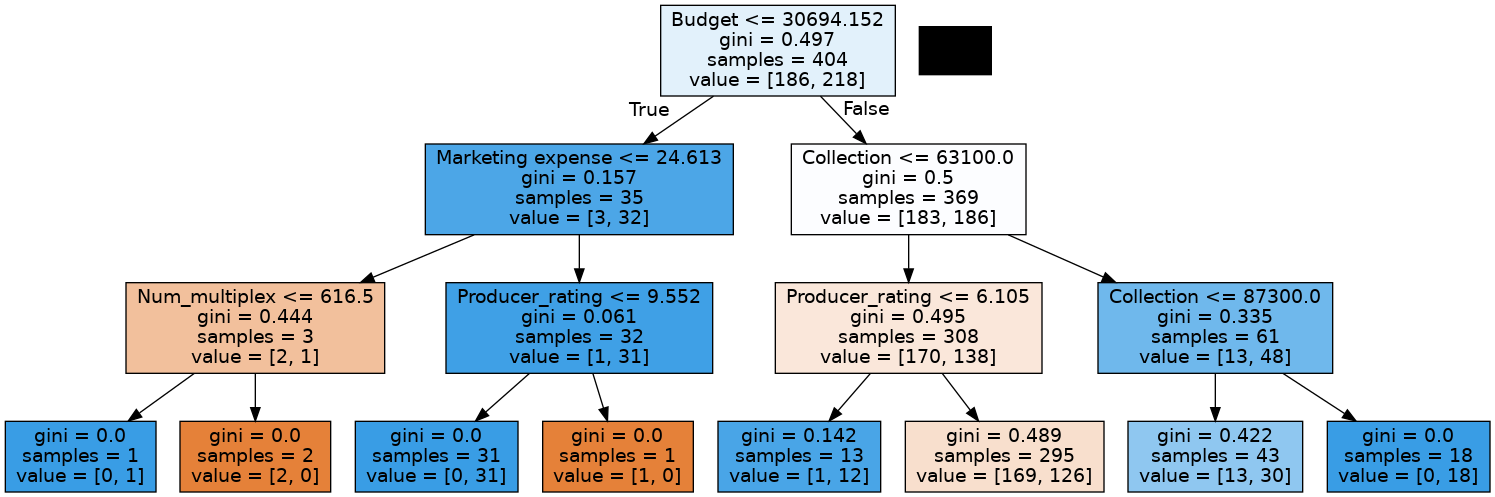

In [28]:
import pydotplus
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [29]:
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)

In [30]:
clftree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

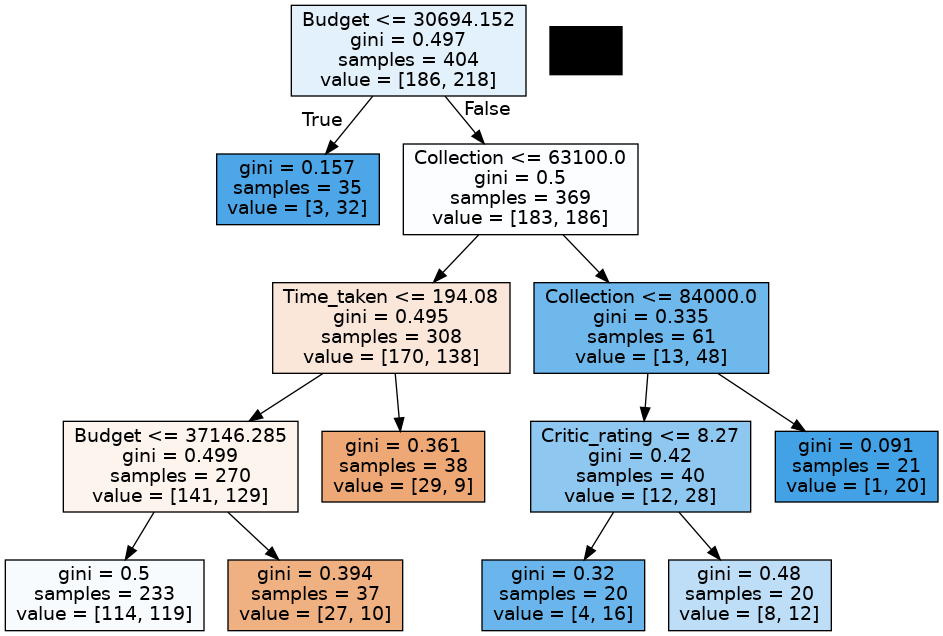

In [31]:
dot_data=tree.export_graphviz(clftree2,out_file=None,feature_names=X_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# Bagging

In [32]:
clftree=tree.DecisionTreeClassifier()

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bagclf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [35]:
bagclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [36]:
confusion_matrix(y_test,bagclf.predict(X_test))

array([[27, 17],
       [22, 36]])

In [37]:
accuracy_score(y_test,bagclf.predict(X_test))

0.6176470588235294

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfclf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [40]:
rfclf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [41]:
confusion_matrix(y_test,rfclf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [42]:
accuracy_score(y_test,rfclf.predict(X_test))

0.6372549019607843

# Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rfclf=RandomForestClassifier(n_estimators=250,random_state=42)

In [45]:
params_grid={"max_features":[3,4,5,6,7,8,9,10],
            "min_samples_split":[2,3,10]}

In [46]:
gridsearch=GridSearchCV(rfclf,params_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [47]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [48]:
gridsearch.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [49]:
cvrf_clf=gridsearch.best_estimator_

In [50]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.6274509803921569

In [51]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]])

# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [54]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.5784313725490197

In [55]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [56]:
gbc_clf2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [57]:
accuracy_score(y_test,gbc_clf2.predict(X_test))

0.6176470588235294

In [58]:
params_gridgbc={"learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1],
               "n_estimators":[250,500],
               "max_depth":[1,2,3,4]}
gridsearch=GridSearchCV(gbc_clf,params_gridgbc,n_jobs=-1,cv=5,scoring='accuracy')

In [59]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [250, 500]},
             scoring='accuracy')

In [60]:
gridsearch.best_params_

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 250}

In [61]:
bestgbc_clf=gridsearch.best_estimator_

In [62]:
accuracy_score(y_test,bestgbc_clf.predict(X_test))

0.6274509803921569

# AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
abc_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [65]:
abc_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [66]:
accuracy_score(y_test,abc_clf.predict(X_test))

0.6274509803921569

In [67]:
ada_clf2=AdaBoostClassifier(rfclf,learning_rate=0.05,n_estimators=500)

In [68]:
ada_clf2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [69]:
accuracy_score(y_test,ada_clf2.predict(X_test))

0.6176470588235294

# XGBoost

In [70]:
import xgboost as xgb

In [71]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [75]:
%%time
xgb_clf.fit(X_train,y_train)

CPU times: user 3min 14s, sys: 8.99 s, total: 3min 23s
Wall time: 58.3 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

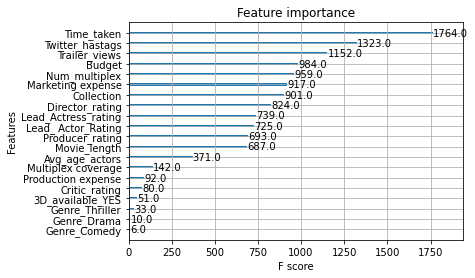

In [74]:
xgb.plot_importance(xgb_clf)

In [88]:
xgb_clf=xgb.XGBClassifier(learning_rate=0.05,random_state=42,n_estimators=10000)

In [95]:
params_test1={
    
    'gamma':[0.1,0.2,0.3,0.4],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
}

In [96]:
grid_search=GridSearchCV(xgb_clf,params_test1,n_jobs=-1,cv=5,scoring='accuracy')

In [97]:
%%time
grid_search.fit(X_train,y_train)

CPU times: user 3min 23s, sys: 7.4 s, total: 3min 30s
Wall time: 22min 13s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [98]:
grid_search.best_params_

{'colsample_bytree': 0.8, 'gamma': 0.4, 'subsample': 0.8}

In [99]:
grid_searchbest=grid_search.best_estimator_

In [100]:
accuracy_score(y_test,grid_searchbest.predict(X_test))

0.6764705882352942